In [3]:
# Full d'anàlisi de dades, corresponent a la pràctica 1a

# Transport de calor en una barra metàl·lica
# RÈGIM PERMANENT, T(0) = Acos(wt)
# Carles Falcó i Gandia



from math import pi
from numpy import array, mean, std, sqrt, log, linspace, exp, polyfit, diag, loadtxt, concatenate, load, save
from scipy.stats import linregress
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [4]:
# Llegim dades
temps, Tg_0, Tg_10, Tg_15, Tp_0, Tp_10, Tp_20 = loadtxt('B2.dat', unpack = True)
save('Tg_10.npy',Tg_10)

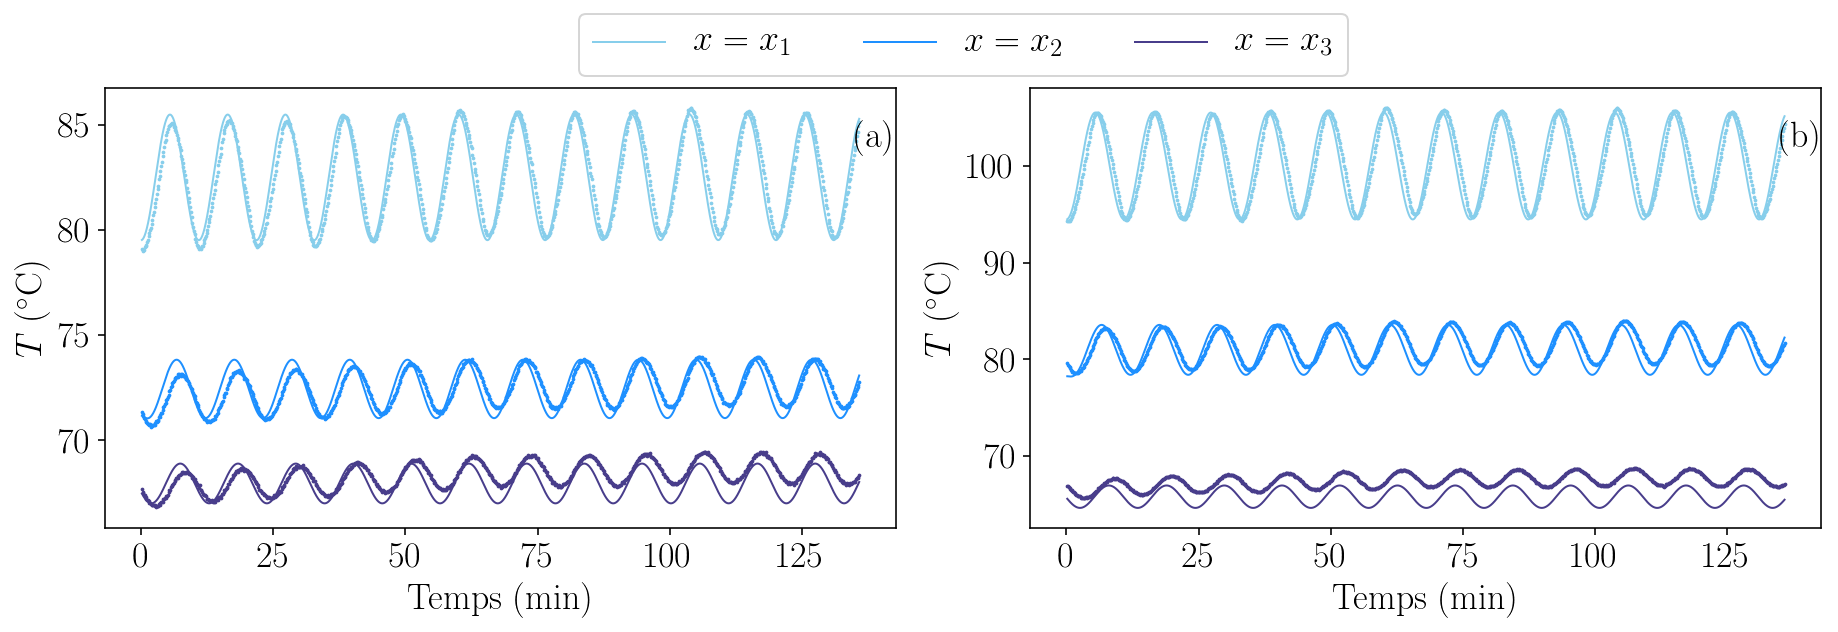

In [6]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (13,4))
fig.tight_layout()
plt.subplots_adjust(wspace = 0.17)

rcParams.update({'font.size': 18})
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

per_0_gran = load('per_al_0_gran.npy') - 273
per_10_gran = load('per_al_10_gran.npy')
per_15_gran = load('per_al_15_gran.npy')
per_0_pet = load('per_al_0_pet.npy')
per_10_pet = load('per_al_10_pet.npy')
per_20_pet = load('per_al_20_pet.npy')
tspan = linspace(temps[0],temps[-1],len(per_0_gran)) 

ax1.scatter(temps/60,Tg_0, marker = '.', s = 3, color = 'skyblue')
ax1.scatter(temps/60,Tg_10, marker = '.', s = 3, color = 'dodgerblue')
ax1.scatter(temps/60,Tg_15, marker = '.', s = 3, color = 'darkslateblue')
ax1.plot(tspan/60,per_0_gran,linewidth = 1, color = 'skyblue', label = '$x = x_1$')
ax1.plot(tspan/60,per_10_gran,linewidth = 1, color = 'dodgerblue',label = '$x = x_2$')
ax1.plot(tspan/60,per_15_gran,linewidth = 1, color = 'darkslateblue',label = '$x = x_3$')
ax1.set_xlabel('Temps (min)')
ax1.legend(loc = 'upper center', bbox_to_anchor = [1.085,1.21], ncol = 3)
ax1.set_ylabel('$T\;(^\circ$C)')

ax2.scatter(temps/60,Tp_0, marker = '.', s = 3, color = 'skyblue')
ax2.scatter(temps/60,Tp_10, marker = '.', s = 3, color = 'dodgerblue')
ax2.scatter(temps/60,Tp_20, marker = '.', s = 3, color = 'darkslateblue')
ax2.plot(tspan/60,per_0_pet,linewidth = 1, color = 'skyblue')
ax2.plot(tspan/60,per_10_pet,linewidth = 1, color = 'dodgerblue')
ax2.plot(tspan/60,per_20_pet,linewidth = 1, color = 'darkslateblue')
ax2.set_xlabel('Temps (min)')
ax2.set_ylabel('$T\;(^\circ$C)')


ax1.text(135,84,'(a)')
ax2.text(135,102,'(b)')

plt.savefig('simu2.pdf',bbox_inches = 'tight')
#plt.show()

In [12]:
save('Tg_15.npy',Tg_15)

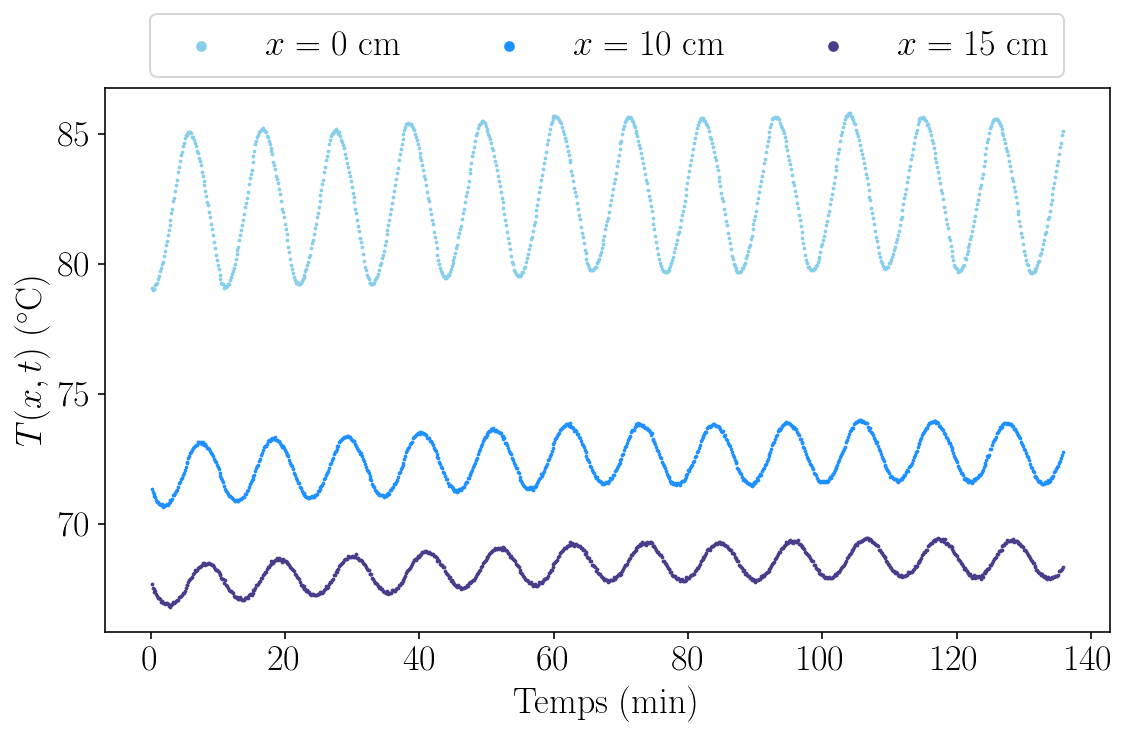

In [4]:
rcParams.update({'font.size': 18})
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize = (9,5))
plt.scatter(temps/60,Tg_0, marker = '.', s = 3, color = 'skyblue',label = '$x = 0$ cm')
plt.scatter(temps/60,Tg_10, marker = '.', s = 3, color = 'dodgerblue', label = '$x = 10$ cm')
plt.scatter(temps/60,Tg_15, marker = '.', s = 3,color = 'darkslateblue',label = '$x = 15$ cm')

plt.ylabel('$T(x,t)$ ($^\circ$C)')
plt.xlabel('Temps (min)')

plt.legend(markerscale = 5, loc = 'upper center', bbox_to_anchor = [0.5,1.17], ncol = 3)
plt.savefig('fig_permanent1.pdf',bbox_inches = 'tight')
plt.show()

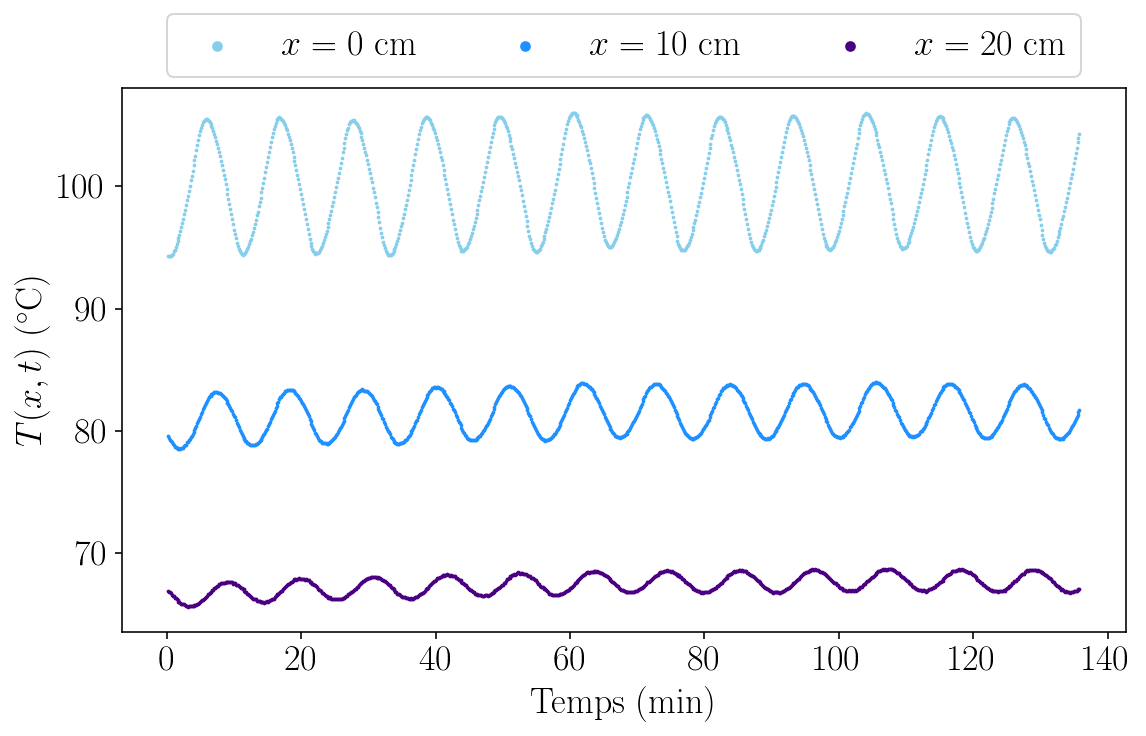

In [5]:
rcParams.update({'font.size': 18})
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize = (9,5))
plt.scatter(temps/60,Tp_0, marker = '.', s = 3, color = 'skyblue',label = '$x = 0$ cm')
plt.scatter(temps/60,Tp_10, marker = '.', s = 3, color = 'dodgerblue', label = '$x = 10$ cm')
plt.scatter(temps/60,Tp_20, marker = '.', s = 3,color = 'indigo',label = '$x = 20$ cm')

plt.ylabel('$T(x,t)$ ($^\circ$C)')
plt.xlabel('Temps (min)')

plt.legend(markerscale = 5, loc = 'upper center', bbox_to_anchor = [0.5,1.17], ncol = 3)
plt.savefig('fig_permanent2.pdf',bbox_inches = 'tight')
plt.show()

In [6]:
Tg_mitjana = array([mean(Tg_0), mean(Tg_10), mean(Tg_15)])
u_Tg_mitjana = array([std(Tg_0), std(Tg_10), std(Tg_15)])/len(Tg_mitjana)
print(Tg_mitjana, u_Tg_mitjana)
Tp_mitjana = array([mean(Tp_0), mean(Tp_10), mean(Tp_20)])
u_Tp_mitjana = array([std(Tp_0), std(Tp_10), std(Tp_20)])/len(Tg_mitjana)
print(Tp_mitjana, u_Tp_mitjana)

[82.47239549 72.47787836 68.34850574] [0.68903228 0.29466648 0.2089996 ]
[100.14146001  81.41105111  67.46296756] [1.26718759 0.53841624 0.24940708]


In [7]:
# Trobant màxims i mínims
# INPUT: Llista de Temperatures: T_dades, nmin i nmax # de mins i maxs
# OUTPUT: min i max, amb mínims i màxims i temps de cadascun
# 1. Pren màxim i mínim de T_dades
# 2. Treu aquests punts i els propers de T_dades
# 3. Torna a 1 i itera fins que els ha trobat tots

def max_and_min(T_dades, nmax, nmin):
    T = list(T_dades)
    t = list(temps)
    maxs = []
    mins = []
    while len(maxs) < nmax:
        M = max(T)
        index_M = list(T_dades).index(M)
        maxs.append([t[index_M],M])
        for i in range(-25,25):
            if index_M + i > -1 and index_M + i < len(T_dades):
                if T_dades[index_M + i] in T:
                    T.remove(T_dades[index_M + i])
    while len(mins) < nmin:
        m = min(T)
        index_m = list(T_dades).index(m)
        mins.append([t[index_m],m])
        for i in range(-25,25):
            if index_m + i > -1 and index_m + i < len(T_dades):
                if T_dades[index_m + i] in T:
                    T.remove(T_dades[index_m + i])
    
    return array(sorted(mins, key = lambda x: x[0])), array(sorted(maxs, key = lambda x: x[0]))

In [8]:
# Amplitud
m_g_0, M_g_0 = max_and_min(Tg_0,13,13)
ag0 = mean([M_g_0[i][1]/2 - m_g_0[i][1]/2 for i in range(len(M_g_0))])
u_ag0 = std([M_g_0[i][1]/2 - m_g_0[i][1]/2 for i in range(len(M_g_0))])/13
m_g_10, M_g_10 = max_and_min(Tg_10,12,13)
ag10 = mean([M_g_10[i][1]/2 - m_g_10[i][1]/2 for i in range(len(M_g_10))])
u_ag10 = std([M_g_10[i][1]/2 - m_g_10[i][1]/2 for i in range(len(M_g_10))])/12
m_g_15, M_g_15 = max_and_min(Tg_15,12,13)
ag15 = mean([M_g_15[i][1]/2 - m_g_15[i][1]/2 for i in range(len(M_g_15))])
u_ag15 = std([M_g_15[i][1]/2 - m_g_15[i][1]/2 for i in range(len(M_g_15))])/12
m_p_0, M_p_0 = max_and_min(Tp_0,12,13)
ap0 = mean([M_p_0[i][1]/2 - m_p_0[i][1]/2 for i in range(len(M_p_0))])
u_ap0 = std([M_p_0[i][1]/2 - m_p_0[i][1]/2 for i in range(len(M_p_0))])/12
m_p_10, M_p_10 = max_and_min(Tp_10,12,13)
ap10 = mean([M_p_10[i][1]/2 - m_p_10[i][1]/2 for i in range(len(M_p_10))])
u_ap10 = std([M_p_10[i][1]/2 - m_p_10[i][1]/2 for i in range(len(M_p_10))])/12
m_p_20, M_p_20 = max_and_min(Tp_20,12,13)
ap20 = mean([M_p_20[i][1]/2 - m_p_20[i][1]/2 for i in range(len(M_p_20))])
u_ap20 = std([M_p_20[i][1]/2 - m_p_20[i][1]/2 for i in range(len(M_p_20))])/12
#plt.scatter(m_p_10[:,0], m_g_10[:,1])
#plt.scatter(M_p_10[:,0], M_g_10[:,1])
#plt.show()
print(ag0,u_ag0)
print(ag10,u_ag10)
print(ag15,u_ag15)
print(ap0,u_ap0)
print(ap10,u_ap10)
print(ap20,u_ap20)

2.9829864615384625 0.006993641354844833
1.2095864583333338 0.0030539600548984765
0.7963133333333339 0.002558222130360863
5.5242121666666675 0.00794045611092454
2.2551523333333345 0.004812219697264252
0.9607534583333338 0.003359170916344401


In [9]:
# Períodes ones tèrmiques
periodes_data_p = concatenate([M_p_0[:,0][1:] - M_p_0[:,0][:-1], M_p_10[:,0][1:] - M_p_10[:,0][:-1], M_p_20[:,0][1:] - M_p_20[:,0][:-1],
                              m_p_0[:,0][1:] - m_p_0[:,0][:-1], m_p_10[:,0][1:] - m_p_10[:,0][:-1], m_p_20[:,0][1:] - m_p_20[:,0][:-1]])
periode_p = mean(periodes_data_p)
u_periode_p = sqrt((std(periodes_data_p)/len(periodes_data_p))**2 + 8**2)

periodes_data_g = concatenate([M_g_0[:,0][1:] - M_g_0[:,0][:-1], M_g_10[:,0][1:] - M_g_10[:,0][:-1], M_g_15[:,0][1:] - M_g_15[:,0][:-1],
                              m_g_0[:,0][1:] - m_g_0[:,0][:-1], m_g_10[:,0][1:] - m_g_10[:,0][:-1], m_g_15[:,0][1:] - m_g_15[:,0][:-1]])
periode_g = mean(periodes_data_g)
u_periode_g = sqrt(std(periodes_data_g)**2/(len(periodes_data_g))**2 + 8**2)
print(periode_p, u_periode_p)
print(periode_g, u_periode_g)

655.4106521739129 8.005463304418821
654.3659142857143 8.005805856925324


In [10]:
# Temps d'escalfament i refredament
ref_p = concatenate([m_p_0[:,0][1:] - M_p_0[:,0]]),# m_p_10[:,0][1:] - M_p_10[:,0], m_p_20[:,0][1:] - M_p_20[:,0]])
esc_p = concatenate([M_p_0[:,0] - m_p_0[:,0][:-1]])#, M_p_10[:,0] - m_p_10[:,0][:-1], M_p_20[:,0] - m_p_20[:,0][:-1]])
print(mean(esc_p), std(esc_p)/len(esc_p))
print(mean(ref_p), std(ref_p)/len(ref_p))
ref_g = concatenate([m_g_0[:,0][1:] - M_g_0[:,0][:-1]]) #, m_g_10[:,0][1:] - M_g_10[:,0], m_g_15[:,0][1:] - M_g_15[:,0]])
esc_g = concatenate([M_g_0[:,0] - m_g_0[:,0]])# M_g_10[:,0] - m_g_10[:,0][:-1], M_g_15[:,0] - m_g_15[:,0][:-1]])
print(mean(esc_g), std(esc_g)/len(esc_g))
print(mean(ref_g), std(ref_g)/len(ref_g))

327.8645833333333 0.669363901729027
327.1413333333334 8.984504422739326
329.32046153846164 1.380921359197214
320.82283333333334 0.7282474490372928


In [11]:
# Desfasament
delta_p_vect_10 = concatenate([m_p_10[:,0] - m_p_0[:,0], M_p_10[:,0] - M_p_0[:,0]])
delta_p_10 = mean(delta_p_vect_10)
u_delta_p_10 = std(delta_p_vect_10)/len(delta_p_vect_10)
delta_p_vect_20 = concatenate([m_p_20[:,0] - m_p_0[:,0], M_p_20[:,0] - M_p_0[:,0]])
delta_p_20 = mean(delta_p_vect_20)
u_delta_p_20 = std(delta_p_vect_20)/len(delta_p_vect_20)

delta_g_vect_10 = concatenate([m_g_10[:,0] - m_p_0[:,0], M_g_10[:,0] - M_g_0[:,0][:-1]])
delta_g_10 = mean(delta_g_vect_10)
u_delta_g_10 = std(delta_g_vect_10)/len(delta_g_vect_10)
delta_g_vect_15 = concatenate([m_g_15[:,0] - m_p_0[:,0], M_g_15[:,0] - M_g_0[:,0][:-1]])
delta_g_15 = mean(delta_g_vect_15)
u_delta_g_15 = std(delta_g_vect_15)/len(delta_g_vect_15)

desf_p_10 = 2*pi/periode_p*delta_p_10
u_desf_p_10 = desf_p_10*sqrt( (u_periode_p/periode_p)**2 + (u_delta_p_10/delta_p_10)**2 )
desf_p_20 = 2*pi/periode_p*delta_p_20
u_desf_p_20 = desf_p_20*sqrt( (u_periode_p/periode_p)**2 + (u_delta_p_20/delta_p_20)**2 )
desf_g_10 = 2*pi/periode_g*delta_g_10
u_desf_g_10 = desf_g_10*sqrt( (u_periode_g/periode_g)**2 + (u_delta_g_10/delta_g_10)**2 )
desf_g_15 = 2*pi/periode_g*delta_g_15
u_desf_g_15 = desf_g_15*sqrt( (u_periode_g/periode_g)**2 + (u_delta_g_15/delta_g_15)**2 )
print(desf_p_10/2/pi*360, u_desf_p_10/2/pi*360)
print(desf_p_20/2/pi*360, u_desf_p_20*360/2/pi)
print(desf_g_10/2/pi*360, u_desf_g_10*360/2/pi)
print(desf_g_15/2/pi*360, u_desf_g_15*360/2/pi)

49.60466707729537 0.6400377552178705
100.88741002405064 1.3098590721226941
52.09400926270738 0.7209131208559427
82.31544893165274 1.0912611212188674


In [22]:
# Paràmetre m
m_g = mean(-array([log(ag10/ag0)/(0.10),log(ag15/ag0)/(0.15)]))
u_m_g_vect = array([1/0.1*sqrt( (u_ag10/ag10)**2 + (u_ag0/ag0)**2), 1/0.15*sqrt( (u_ag15/ag15)**2 + (u_ag0/ag0)**2)])
u_m_g = 1/2*sqrt(sum(u_m_g_vect**2))
m_p = mean(-array([log(ap10/ap0)/(0.10),log(ap20/ap0)/(0.20)]))
#u_m_p_est = std(-array([log(ap10/ap0)/(0.10),log(ap20/ap0)/(0.20)]))/len(array([log(ap10/ap0)/(0.01),log(ap20/ag0)/(0.02)]))
u_m_p_vect = array([1/0.1*sqrt( (u_ap10/ap10)**2 + (u_ap0/ap0)**2), 1/0.2*sqrt( (u_ap20/ap20)**2 + (u_ap0/ap0)**2)])
u_m_p = 1/2*sqrt(sum(u_m_p_vect**2))
print(m_g,u_m_g)
print(m_p,u_m_p)

8.915523854599957 0.021737804996251435
8.852560825783709 0.015962646010629935


In [27]:
# Paràmetre h
h_g = mean([desf_g_10/0.1,desf_g_15/0.15])
u_h_g = 1/2*sqrt(sum(array([u_desf_g_10/0.1,u_desf_g_15/0.15])**2))
h_p = mean([desf_p_10/0.1,desf_p_20/0.2])
u_h_p = 1/2*sqrt(sum(array([u_desf_p_10/0.1,u_desf_p_20/0.2])**2))
print(h_g,u_h_g)
print(h_p,u_h_p)

9.334978608041968 0.08937818853263457
8.73086752109522 0.07991345134143292


In [42]:
# Coeficient de pèrdues laterals lambda
K = 205
dg = 0.051
dp = 0.03
ud = 0.005
uK = 1
lamb_g = (m_g**2-h_g**2)*205*dg/4
u_lamb_g = sqrt(K**2*dg**2/4*(m_g**2*u_m_g**2+h_g**2*u_h_g**2) + lamb_g**2*(1**2/K**2+ud**2/dg**2))
lamb_p = (m_p**2-h_p**2)*205*dp/4
u_lamb_p = sqrt(K**2*dp**2/4*(m_p**2*u_m_p**2+h_p**2*u_h_p**2) + lamb_p**2*(1**2/K**2+ud**2/dp**2))
print(lamb_g,u_lamb_g)
print(lamb_p,u_lamb_p)

-20.00893585286332 4.889476301962947
3.2899202113005743 2.2567163472157095


In [7]:
from numpy import save
save('bc_permanent_gran.npy',Tg_0)
save('bc_permanent_petita.npy',Tp_0)
save('temps_experiment.npy',temps)

NameError: name 'plt' is not defined

In [7]:
len(per_0_gran)/1.3

81416.92307692308